# **GENETIC ALGORITHM KONTINU FROM SCRATCH**

## **1. Import Library**

Pengolahan Data

In [ ]:
import numpy as np
from numpy.random import randint
from random import random as rnd
from random import gauss, randrange

## **2. Mendifinikan Fungsi GA**

### **2.1 Individual**

In [ ]:
def individual(number_of_genes, upper_limit, lower_limit):
    individual=[round(rnd()*(upper_limit-lower_limit)
                +lower_limit,1) for x in range(number_of_genes)]
    return individual

### **2.2 Populasi**

In [ ]:
def population(number_of_individuals,
               number_of_genes, upper_limit, lower_limit):
    return [individual(number_of_genes, upper_limit, lower_limit)
        for x in range(number_of_individuals)]

### **2.3 Perhitungan Fitness**

In [ ]:
def fitness_calculation(individual):
    fitness_value = sum(individual)
    return fitness_value

### **2.4 Seleksi Data**

In [ ]:
def roulette(cum_sum, chance):
    veriable = list(cum_sum.copy())
    veriable.append(chance)
    veriable = sorted(veriable)
    return veriable.index(chance)

## **3. Membuat Fungsi Impelementasi GA**

### **3.1 Seleksi Data serta inisialisasi Data**

In [ ]:
def selection(generation, method='Fittest Half'):
    generation['Normalized Fitness'] = \
        sorted([generation['Fitness'][x]/sum(generation['Fitness'])
        for x in range(len(generation['Fitness']))], reverse = True)
    generation['Cumulative Sum'] = np.array(
        generation['Normalized Fitness']).cumsum()
    if method == 'Roulette Wheel':
        selected = []
        for x in range(len(generation['Individuals'])//2):
            selected.append(roulette(generation
                ['Cumulative Sum'], rnd()))
            while len(set(selected)) != len(selected):
                selected[x] = \
                    (roulette(generation['Cumulative Sum'], rnd()))
        selected = {'Individuals':
            [generation['Individuals'][int(selected[x])]
                for x in range(len(generation['Individuals'])//2)]
                ,'Fitness': [generation['Fitness'][int(selected[x])]
                for x in range(
                    len(generation['Individuals'])//2)]}
    elif method == 'Fittest Half':
        selected_individuals = [generation['Individuals'][-x-1]
            for x in range(int(len(generation['Individuals'])//2))]
        selected_fitnesses = [generation['Fitness'][-x-1]
            for x in range(int(len(generation['Individuals'])//2))]
        selected = {'Individuals': selected_individuals,
                    'Fitness': selected_fitnesses}
    elif method == 'Random':
        selected_individuals = \
            [generation['Individuals']
                [randint(1,len(generation['Fitness']))]
            for x in range(int(len(generation['Individuals'])//2))]
        selected_fitnesses = [generation['Fitness'][-x-1]
            for x in range(int(len(generation['Individuals'])//2))]
        selected = {'Individuals': selected_individuals,
                    'Fitness': selected_fitnesses}
    return selected

### **3.2 Mencari kecocokan Gen**

In [ ]:
def pairing(elit, selected, method = 'Fittest'):
    individuals = [elit['Individuals']]+selected['Individuals']
    fitness = [elit['Fitness']]+selected['Fitness']
    if method == 'Fittest':
        parents = [[individuals[x],individuals[x+1]]
                   for x in range(len(individuals)//2)]
    if method == 'Random':
        parents = []
        for x in range(len(individuals)//2):
            parents.append(
                [individuals[randint(0,(len(individuals)-1))],
                 individuals[randint(0,(len(individuals)-1))]])
            while parents[x][0] == parents[x][1]:
                parents[x][1] = individuals[
                    randint(0,(len(individuals)-1))]
    if method == 'Weighted Random':
        normalized_fitness = sorted(
            [fitness[x] /sum(fitness)
             for x in range(len(individuals)//2)], reverse = True)
        cummulitive_sum = np.array(normalized_fitness).cumsum()
        parents = []
        for x in range(len(individuals)//2):
            parents.append(
                [individuals[roulette(cummulitive_sum,rnd())],
                 individuals[roulette(cummulitive_sum,rnd())]])
            while parents[x][0] == parents[x][1]:
                parents[x][1] = individuals[
                    roulette(cummulitive_sum,rnd())]
    return parents

### **3.3 Melakukan persialngan**

In [ ]:
def mating(parents, method='Single Point'):
    if method == 'Single Point':
        pivot_point = randint(1, len(parents[0]))
        offsprings = [parents[0] \
            [0:pivot_point]+parents[1][pivot_point:]]
        offsprings.append(parents[1]
            [0:pivot_point]+parents[0][pivot_point:])
    if method == 'Two Pionts':
        pivot_point_1 = randint(1, len(parents[0]-1))
        pivot_point_2 = randint(1, len(parents[0]))
        while pivot_point_2<pivot_point_1:
            pivot_point_2 = randint(1, len(parents[0]))
        offsprings = [parents[0][0:pivot_point_1]+
            parents[1][pivot_point_1:pivot_point_2]+
            [parents[0][pivot_point_2:]]]
        offsprings.append([parents[1][0:pivot_point_1]+
            parents[0][pivot_point_1:pivot_point_2]+
            [parents[1][pivot_point_2:]]])
    return offsprings

### **3.4 Melakukan permutasian**

In [ ]:
def mutation(individual, upper_limit, lower_limit, muatation_rate=2,
    method='Reset', standard_deviation = 0.001):
    gene = [randint(0, 7)]
    for x in range(muatation_rate-1):
        gene.append(randint(0, 7))
        while len(set(gene)) < len(gene):
            gene[x] = randint(0, 7)
    mutated_individual = individual.copy()
    if method == 'Gauss':
        for x in range(muatation_rate):
            mutated_individual[x] = \
            round(individual[x]+gauss(0, standard_deviation), 1)
    if method == 'Reset':
        for x in range(muatation_rate):
            mutated_individual[x] = round(rnd()* \
                (upper_limit-lower_limit)+lower_limit,1)
    return mutated_individual

### **3.5 Membuat Generasi Baru berdasarkan mutasi**

In [ ]:
def next_generation(gen, upper_limit, lower_limit):
    elit = {}
    next_gen = {}
    elit['Individuals'] = gen['Individuals'].pop(-1)
    elit['Fitness'] = gen['Fitness'].pop(-1)
    selected = selection(gen)
    parents = pairing(elit, selected)
    offsprings = [[[mating(parents[x])
                    for x in range(len(parents))]
                    [y][z] for z in range(2)]
                    for y in range(len(parents))]
    offsprings1 = [offsprings[x][0]
                   for x in range(len(parents))]
    offsprings2 = [offsprings[x][1]
                   for x in range(len(parents))]
    unmutated = selected['Individuals']+offsprings1+offsprings2
    mutated = [mutation(unmutated[x], upper_limit, lower_limit)
        for x in range(len(gen['Individuals']))]
    unsorted_individuals = mutated + [elit['Individuals']]
    unsorted_next_gen = \
        [fitness_calculation(mutated[x])
         for x in range(len(mutated))]
    unsorted_fitness = [unsorted_next_gen[x]
        for x in range(len(gen['Fitness']))] + [elit['Fitness']]
    sorted_next_gen = \
        sorted([[unsorted_individuals[x], unsorted_fitness[x]]
            for x in range(len(unsorted_individuals))],
                key=lambda x: x[1])
    next_gen['Individuals'] = [sorted_next_gen[x][0]
        for x in range(len(sorted_next_gen))]
    next_gen['Fitness'] = [sorted_next_gen[x][1]
        for x in range(len(sorted_next_gen))]
    gen['Individuals'].append(elit['Individuals'])
    gen['Fitness'].append(elit['Fitness'])
    return next_gen

### **3.6 Menghitung Fitness akhir**

In [ ]:
def fitness_similarity_chech(max_fitness, number_of_similarity):
    result = False
    similarity = 0
    for n in range(len(max_fitness)-1):
        if max_fitness[n] == max_fitness[n+1]:
            similarity += 1
        else:
            similarity = 0
    if similarity == number_of_similarity-1:
        result = True
    return result

## **4. Impelementasi GA dengan data**

### **4.1 Impelementasi tanpa menyimpan record pelatihan**

In [ ]:
def first_generation(pop):
    fitness = [fitness_calculation(pop[x])
        for x in range(len(pop))]
    sorted_fitness = sorted([[pop[x], fitness[x]]
        for x in range(len(pop))], key=lambda x: x[1])
    population = [sorted_fitness[x][0]
        for x in range(len(sorted_fitness))]
    fitness = [sorted_fitness[x][1]
        for x in range(len(sorted_fitness))]
    return {'Individuals': population, 'Fitness': sorted(fitness)}
pop = population(20,8,1,0)
gen = []
gen.append(first_generation(pop))
fitness_avg = np.array([sum(gen[0]['Fitness'])/
                        len(gen[0]['Fitness'])])
fitness_max = np.array([max(gen[0]['Fitness'])])
finish = False
while finish == False:
    if max(fitness_max) > 6:
        break
    if max(fitness_avg) > 5:
        break
    if fitness_similarity_chech(fitness_max, 50) == True:
        break
    gen.append(next_generation(gen[-1],1,0))
    fitness_avg = np.append(fitness_avg, sum(
        gen[-1]['Fitness'])/len(gen[-1]['Fitness']))
    fitness_max = np.append(fitness_max, max(gen[-1]['Fitness']))
    print(gen)

### **4.2 Impelementasi dengan menyimpan record pelatihan**

In [ ]:
Result_file = 'GA_Results.txt'

def first_generation(pop):
    fitness = [fitness_calculation(pop[x])
        for x in range(len(pop))]
    sorted_fitness = sorted([[pop[x], fitness[x]]
        for x in range(len(pop))], key=lambda x: x[1])
    population = [sorted_fitness[x][0]
        for x in range(len(sorted_fitness))]
    fitness = [sorted_fitness[x][1]
        for x in range(len(sorted_fitness))]
    return {'Individuals': population, 'Fitness': sorted(fitness)}
pop = population(20,8,1,0)
gen = []
gen.append(first_generation(pop))
fitness_avg = np.array([sum(gen[0]['Fitness'])/
                        len(gen[0]['Fitness'])])
fitness_max = np.array([max(gen[0]['Fitness'])])
res = open(Result_file, 'a')
res.write('\n'+str(gen)+'\n')
res.close()
finish = False
while finish == False:
    if max(fitness_max) > 6:
        break
    if max(fitness_avg) > 5:
        break
    if fitness_similarity_chech(fitness_max, 50) == True:
        break
    gen.append(next_generation(gen[-1],1,0))
    fitness_avg = np.append(fitness_avg, sum(
        gen[-1]['Fitness'])/len(gen[-1]['Fitness']))
    fitness_max = np.append(fitness_max, max(gen[-1]['Fitness']))
    print(gen)
    res = open(Result_file, 'a')
    res.write('\n'+str(gen[-1])+'\n')
    res.close()

In [ ]:
f = open("GA_Results.txt", "r")
for i in f:
  print(i)

# **ACTIVITY**

# **LENGAKPI GA IMPLEMENTASI KLASIFIKASI**

## **1. Import Library**

Pengolahan Data

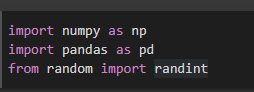

Visualisasi Data

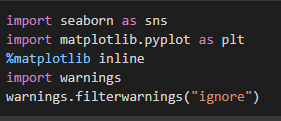

Impelementasi Model

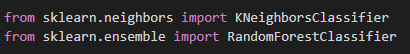

Pembagian Data

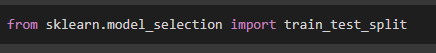

Evaluasi Model

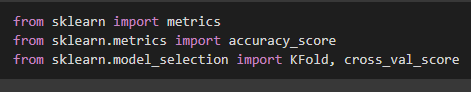

## **2. Data Understanding**

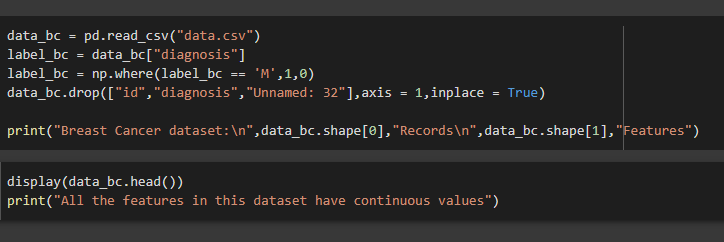

## **3. Penyiapan Dataset**

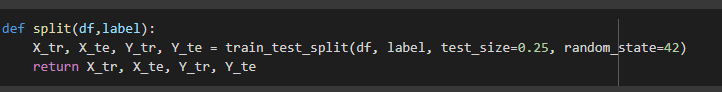

## **4. Definisi Model**

### **4.1 Seleksi Data dan Update**

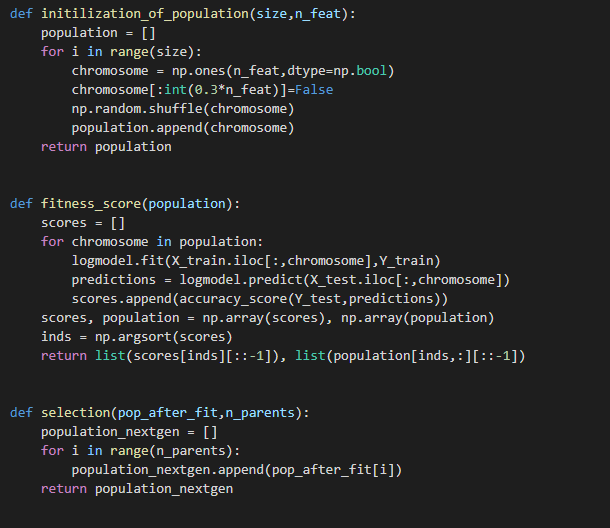

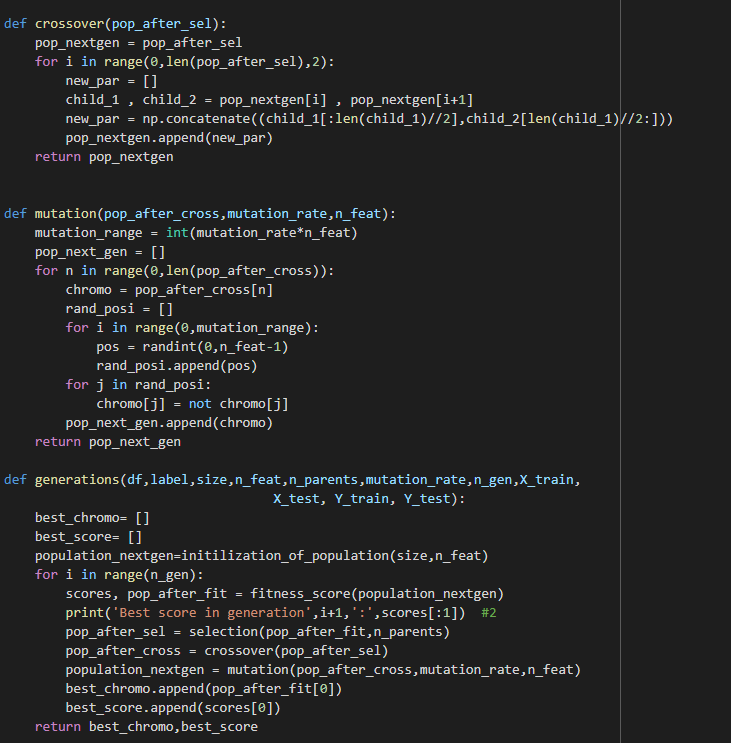

### **4.2 Model**

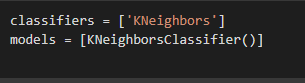

### **4.3 Membuat Evaluasi Model**

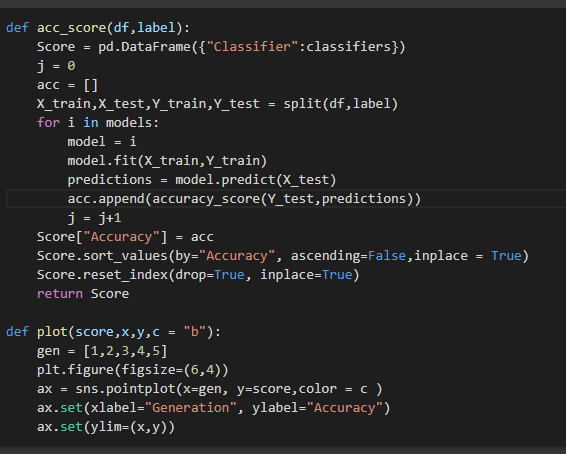

## **5. Impelementasi Model**

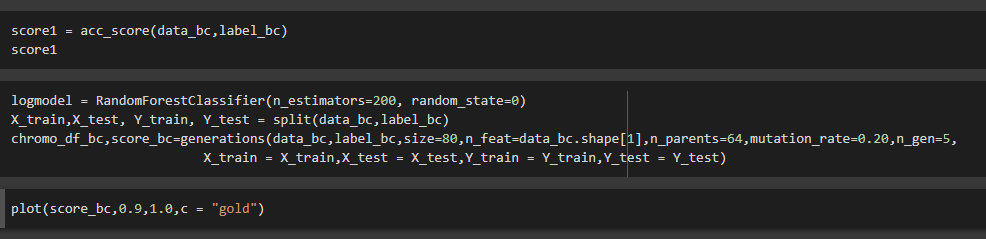